In [7]:
import flatspin.model as md
import matplotlib.pyplot as plt
import numpy as np


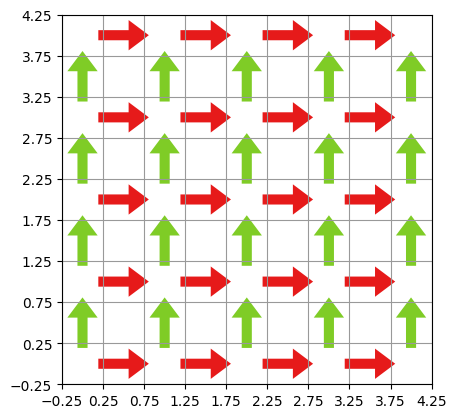

In [8]:
model = md.SquareSpinIceClosed()
model.plot()

def draw_grid(grid):
    edges = grid.edges()
    #print(edges)
    xmin, ymin, xmax, ymax = grid.extent
    #print(xmin, ymin, xmax, ymax)
    plt.grid(True, c='#999', alpha=1)
    
    plt.xticks(edges[0])
    plt.yticks(edges[1])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

grid = model.grid()
draw_grid(grid)

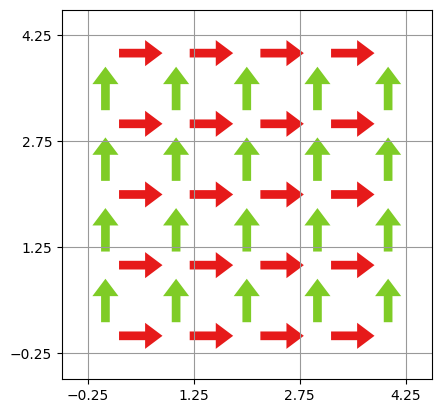

In [9]:
model = md.SquareSpinIceClosed()
grid = model.grid(cell_size=(1.5,1.5))
draw_grid(grid)
model.plot()

[ 0  1  2  3  4  5  6  7  8  9 10]
[5 4 3 2 1 0 1 2 3 4 5]
[[ 0  5]
 [ 1  4]
 [ 2  3]
 [ 3  2]
 [ 4  1]
 [ 5  0]
 [ 6  1]
 [ 7  2]
 [ 8  3]
 [ 9  4]
 [10  5]]


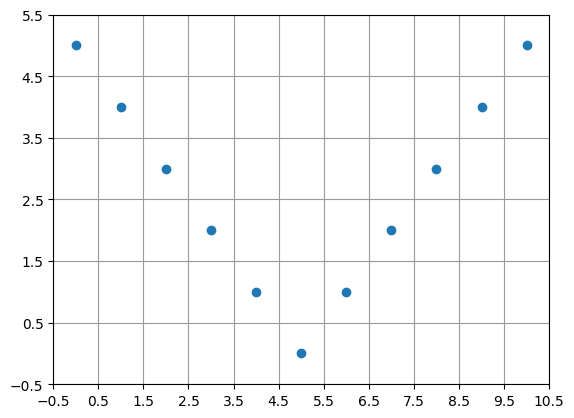

In [10]:
from flatspin.grid import Grid

x = np.arange(11)
print(x)
y = np.abs(x-5)
print(y)
points = np.column_stack([x, y])
print(points)
grid = Grid(points)

plt.scatter(x, y)
draw_grid(grid)

Spin 6 in cell: (array([0, 0]), array([1, 2]))
Spin 28 in cell: (2, 1)
Cell (0,0) contains: [0 4 5 9]
Cell (2,1) contains: [28 29 33 37 38]


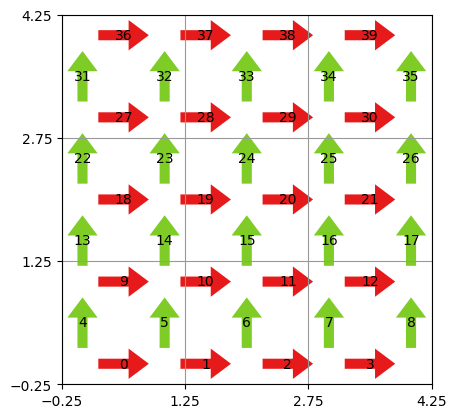

In [11]:
grid = model.grid(cell_size=(1.5, 1.5))

print('Spin 6 in cell:', grid.grid_index([6,7]))
print('Spin 28 in cell:', grid.grid_index(28))
print('Cell (0,0) contains:', grid.point_index((0,0)))
print('Cell (2,1) contains:', grid.point_index((2,1)))

model.plot()
# Label spin indices for reference
for i in model.indices():
    plt.text(model.pos[i,0], model.pos[i,1], str(i), ha='center', va='center')
draw_grid(grid)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), array([0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2]))
[ 1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1
  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1]


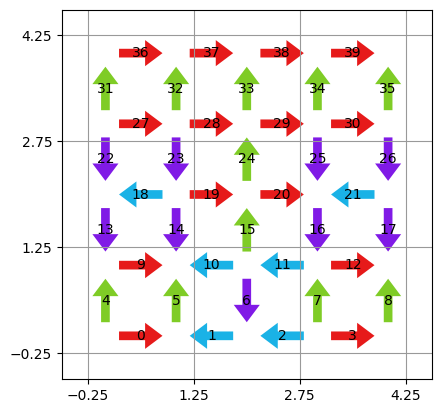

In [12]:
model = md.SquareSpinIceClosed()
# 2D array representing grid with values
# Note that the origin of the grid is in the bottom-left, hence
# the first row of values map to the bottom row of the grid
values = np.array(
    [[1, -1, 1],
     [-1, 1, -1],
     [1, 1, 1]])
# Create an appropriate fixed grid
grid = model.fixed_grid((values.shape[1], values.shape[0]))

# Map all spin indices to grid index
spin_inds = model.all_indices()
print(spin_inds)
grid_inds = grid.grid_index(spin_inds)
print(grid_inds)
# Set spin based on grid values
model.spin[spin_inds] = values[grid_inds]
print(values[grid_inds])

draw_grid(grid)
model.plot();
for i in model.indices():
    plt.text(model.pos[i,0], model.pos[i,1], str(i), ha='center', va='center')

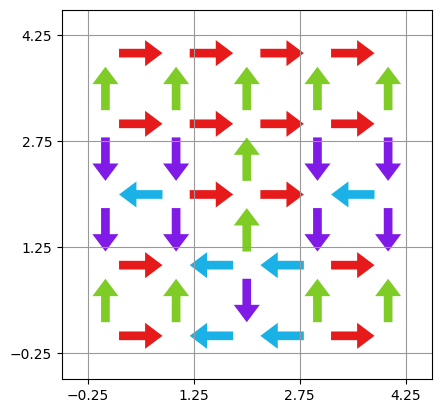

In [13]:
values = np.array(
    [[1, -1, 1],
     [-1, 1, -1],
     [1, 1, 1]])

grid = model.fixed_grid((values.shape[1], values.shape[0]))
model.set_grid('spin', values)

draw_grid(grid)
model.plot();

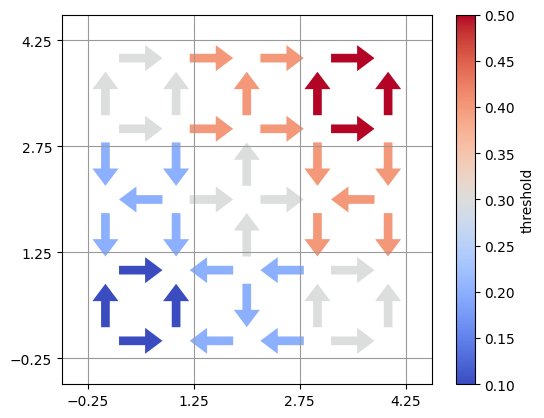

In [14]:
values = np.array([
    [0.1, 0.2, 0.3],
    [0.2, 0.3, 0.4],
    [0.3, 0.4, 0.5]
])

model.set_grid('threshold', values)

draw_grid(grid)
quiv = model.plot(C=model.threshold, cmap='coolwarm')
plt.colorbar(quiv, label='threshold');

In [15]:
# Count number of spins in each grid cell
grid.add_values(np.ones(model.spin_count))

array([[4., 5., 4.],
       [5., 4., 5.],
       [4., 5., 4.]])

In [16]:
# Sum the spins in each grid cell
grid.add_values(model.spin)

array([[ 4, -5,  4],
       [-5,  4, -5],
       [ 4,  5,  4]], dtype=int8)

In [17]:
# Mean spin in each cell
grid.add_values(model.spin, method='mean')

array([[ 1, -1,  1],
       [-1,  1, -1],
       [ 1,  1,  1]], dtype=int8)

In [18]:
# Mean magnetization in each cell
grid.add_values(model.spin, method='mean')

array([[ 1, -1,  1],
       [-1,  1, -1],
       [ 1,  1,  1]], dtype=int8)

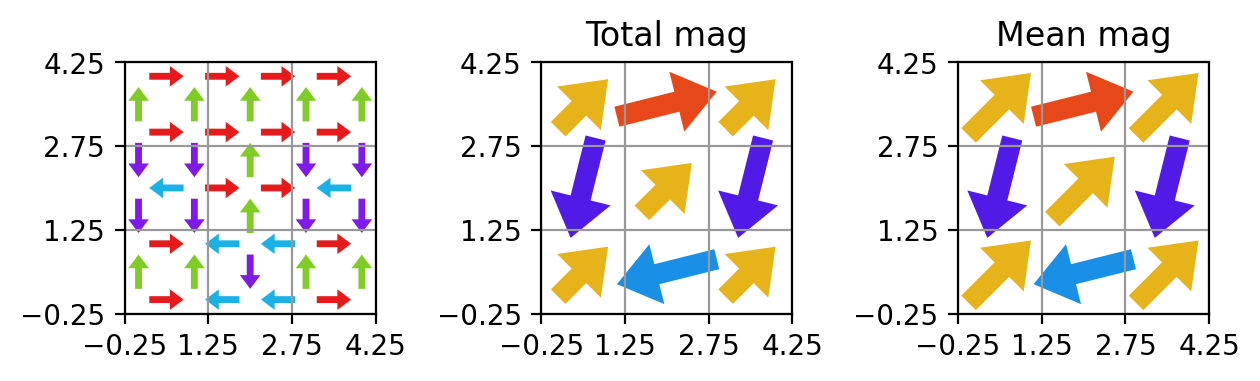

In [20]:
from flatspin.plotting import plot_vectors

plt.figure(dpi=200)

plt.subplot(131)
model.plot()
draw_grid(grid)
plt.tight_layout();

# Plot total magnetization in each cell
plt.subplot(132)
UV = grid.add_values(model.vectors, method='sum')
x, y = grid.centers()
XY = np.column_stack([x, y])
plot_vectors(XY, UV, normalize=True);
plt.title('Total mag')
draw_grid(grid)
plt.tight_layout();

# Plot mean magnetization in each cell
plt.subplot(133)
UV = grid.add_values(model.vectors, method='mean')
x, y = grid.centers()
XY = np.column_stack([x, y])
plot_vectors(XY, UV, normalize=True);
plt.title('Mean mag')
draw_grid(grid)
plt.tight_layout();